In [88]:
import pandas as pd

archivo_csv = r'C:\Users\paula\OneDrive\Documentos\Facultad\Proyecto Final\informe_agenda_produccion.xlsx - datos.csv'
df = pd.read_csv(archivo_csv)

print(df.head())

     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

                Início           Finalizado     Fecha entrada Fecha prevista  \
0  22/01/2024 16:05:00  22/01/2024 16:05:00  31/08/2023 12:12      8/11/2023   
1   8/03/2024 11:32:00  11/03/2024 10:46

In [89]:
df = df.iloc[:, :12 + 1] #Borre las columnas que le siguen a Tiempo Horas
print(df.columns)

Index(['Nº', 'Repetición|Ajuste', 'Cliente', 'Ctd', 'Servicio', 'Sector',
       'Etapa', 'Empleado', 'Início', 'Finalizado', 'Fecha entrada',
       'Fecha prevista', 'Tiempo Horas'],
      dtype='object')


In [90]:
print(df.head())

     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

                Início           Finalizado     Fecha entrada Fecha prevista  \
0  22/01/2024 16:05:00  22/01/2024 16:05:00  31/08/2023 12:12      8/11/2023   
1   8/03/2024 11:32:00  11/03/2024 10:46

#### Borro los registros de los pedidos que no finalizaron

In [91]:
# Contar la cantidad de IDs únicos antes del filtrado
ids_antes = df['Nº'].nunique()

# Filtrar los IDs de los pedidos que tienen algún valor nulo en la columna 'Finalizado'
ids_con_finalizado_nulo = df[df['Finalizado'].isna()]['Nº'].unique()

# Eliminar todos los registros que pertenezcan a los IDs filtrados
df = df[~df['Nº'].isin(ids_con_finalizado_nulo)]

# Contar la cantidad de IDs únicos después del filtrado
ids_despues = df['Nº'].nunique()

# Mostrar cuántos registros quedaron después del filtrado
print(f"Cantidad de registros después del filtrado: {df.shape[0]}")

# Mostrar la cantidad de IDs únicos antes y después del filtrado
print(f"Cantidad de IDs antes del filtrado: {ids_antes}")
print(f"Cantidad de IDs después del filtrado: {ids_despues}")


Cantidad de registros después del filtrado: 13226
Cantidad de IDs antes del filtrado: 2807
Cantidad de IDs después del filtrado: 2685


#### Grafico los días que me tardaron todos los pedidos

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Función para convertir 'HH:MM' a minutos totales
def convertir_a_minutos(tiempo_str):
    try:
        horas, minutos = map(int, tiempo_str.split(':'))
        return horas * 60 + minutos
    except:
        return None  # Manejar valores no válidos

# Aplica la función de conversión a la columna 'Tiempo Horas' para obtener minutos
df['Tiempo Minutos'] = df['Tiempo Horas'].apply(convertir_a_minutos)

# Convierte los minutos a días
df['Tiempo Días'] = df['Tiempo Minutos'] / 1440  # 1440 minutos en un día

# Agrupar por 'Nº' (ID del pedido) y sumar los días de cada pedido
df_agrupado = df.groupby('Nº')['Tiempo Días'].sum().reset_index()

# Muestra el resultado
print(df_agrupado)

          Nº  Tiempo Días
0     0011-2     3.903472
1     0011-3     5.140972
2     0013-2    19.267361
3     0013-3     2.331944
4     0013-4     0.000694
5       0014     0.136806
6       0015     0.100694
7     0015-2     6.421528
8       0016     0.040972
9       0018    13.704861
10      0020    10.147917
11    0020-2     1.191667
12      0023     4.763889
13      0024     7.314583
14    0024-2     0.000000
15    0024-3     4.109028
16      0025    11.628472
17      0026     0.002083
18      0027     5.638194
19      0028    15.891667
20      0029    10.650000
21    0029-2     1.209722
22      0031     4.610417
23    0031-2     5.704167
24      0032     0.000694
25      0033    27.595139
26      0034     5.120139
27      0035     4.326389
28    0035-2     0.455556
29      0038     0.628472
30    0038-2     0.031250
31      0039     0.000694
32    0039-2     0.001389
33    0039-3    10.351389
34      0040     8.760417
35      0041     5.857639
36      0042     4.654167
37    0042-2

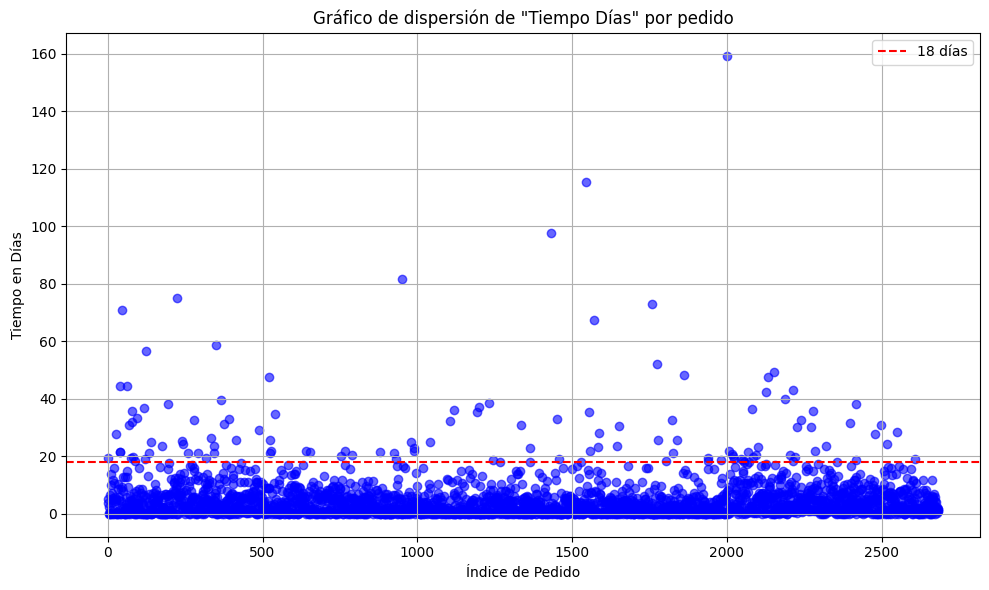

In [93]:
import matplotlib.pyplot as plt

# Graficar el scatter plot de los puntos de 'Tiempo Días'
plt.figure(figsize=(10, 6))

# Usamos el índice del DataFrame para el eje X y 'Tiempo Días' para el eje Y
plt.scatter(df_agrupado.index, df_agrupado['Tiempo Días'], color='blue', alpha=0.6)

# Agregar una línea horizontal punteada en los 14 días
plt.axhline(y=18, color='red', linestyle='--', label='18 días')

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de dispersión de "Tiempo Días" por pedido')
plt.xlabel('Índice de Pedido')
plt.ylabel('Tiempo en Días')

# Agregar la cuadrícula
plt.grid(True)

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo quede bien distribuido
plt.show()


#### Veo cuantos pedidos duraron mas que 18 días y menos de 4 días

In [94]:
print(df_agrupado.shape[0]) #Cantidad de pedidos
print(df_agrupado[df_agrupado['Tiempo Días'] > 18].shape[0]) #Cantidad de pedidos que tardan más de 18 días
print(df_agrupado[df_agrupado['Tiempo Días'] < 4].shape[0]) #Cantidad de pedidos que tardan menos de 4 días

2685
122
1614


#### Veo la cantidad de Servicios y Etapas que hay

In [95]:
# Contar los tipos de servicios únicos
cantidad_servicios = df['Servicio'].nunique()

# Contar las etapas únicas
cantidad_etapas = df['Etapa'].nunique()

# Mostrar los resultados
print(f"Cantidad de tipos de servicios: {cantidad_servicios}")
print(f"Cantidad de etapas: {cantidad_etapas}")

Cantidad de tipos de servicios: 49
Cantidad de etapas: 35


In [96]:
# Ver las categorías únicas en la columna 'Etapa'
categorias_etapa = df['Etapa'].unique()

# Mostrar las categorías
print("Categorías en la columna 'Etapa':")
print(categorias_etapa)

# Contar cuántos registros hay por cada categoría en la columna 'Etapa'
conteo_etapa = df['Etapa'].value_counts()

# Mostrar el conteo de cada categoría
print("Conteo de registros por categoría en la columna 'Etapa':")
print(conteo_etapa)

Categorías en la columna 'Etapa':
['RESINA' 'PMMA' 'TERMINACION' 'CORONAS' 'DISEÑO DE SONRISA' 'ACABADO'
 'MODELOS' 'MAQUILLAJE' 'GLASEADO' 'DISILICATO' 'INCRUSTACIONES' 'AJUSTE'
 'AJUSTE EN ESTADO VERDE' 'ZIRCONIA' 'LLAVES' 'VACIADO' 'MONTAJE'
 'CARILLAS' 'BIZCOCHADO' 'CEMENTACIÓN' 'ENCIAS' 'PULIDO' 'NUCLEOS'
 'PERNO DE FIBRA' 'RESINA HIBRIDA' 'GUIAS' 'RODETE' 'MAQUETAS'
 'EMERGENTES' 'ENCIA' 'CUBETILLA' 'HIBRIDAS' 'SINTRON' 'ATACHE' 'LEUCITA']
Conteo de registros por categoría en la columna 'Etapa':
Etapa
MODELOS                   2446
MAQUILLAJE                1470
AJUSTE                    1461
CORONAS                   1260
DISEÑO DE SONRISA          974
ZIRCONIA                   859
AJUSTE EN ESTADO VERDE     846
ACABADO                    717
DISILICATO                 545
CEMENTACIÓN                441
VACIADO                    430
MONTAJE                    379
TERMINACION                238
INCRUSTACIONES             219
PMMA                       208
CARILLAS              

In [97]:
# Ver las categorías únicas en la columna 'Etapa'
categorias_servicio = df['Servicio'].unique()

# Mostrar las categorías
print("Categorías en la columna 'Servicio':")
print(categorias_servicio)

# Contar cuántos registros hay por cada categoría en la columna 'Etapa'
conteo_servicio = df['Servicio'].value_counts()

# Mostrar el conteo de cada categoría
print("Conteo de registros por categoría en la columna 'Servicio':")
print(conteo_servicio)

Categorías en la columna 'Servicio':
['Encia Acrilica' 'Provisorio de PMMA Cad Cam' 'Diseño 3D por Pieza'
 'Incrustación de Disilicato' 'Corona de Zirconia Monolitica'
 'Modelo Impreso 3D' 'Mock Up' 'Corona de Disilicato Monolítica'
 'Carilla de Disilicato Monolítica' 'Llave Sat' 'Corrección de Bizcochado'
 'Guia Qururgica 3D' 'Encia Cerámica (X Pieza)' 'Llave de Comprobación'
 'Bizcochado Núcleo de Disilicato' 'Núcleo de Disilicato'
 'Carilla Feldespatica' 'Cementación de T-Base por Pieza'
 'Perno de Fibra Cad Cam' 'Tallado de Emergente' 'Llave de Tranferencia'
 'Incrutación de Resina Híbrida Cad Cam' 'Splint de Mordida'
 'Bizcochado Núcleo de Zirconia' 'Núcleo de Zirconia' 'Rodete de Mordida'
 'Incrustación de Zirconia' 'Corrección diseño 3D'
 'Maryland de Zirconia por Pieza' 'Emergente Cementado de Zirconia'
 'Corona de Resina Hibrida Cad Cam' 'Llave de Comprobación Impresa 3D'
 'Modelo' 'Encia Artificial X 3' 'Encia Diseño' 'Cubetilla'
 'Carilla de Leucita Monolítica' 'Placa estamp

#### Grafico los días de vuelta y veo que hay muchos pedidos que tardan menos de un día y me doy cuenta que es porque se realizan tareas que duran 1 minuto

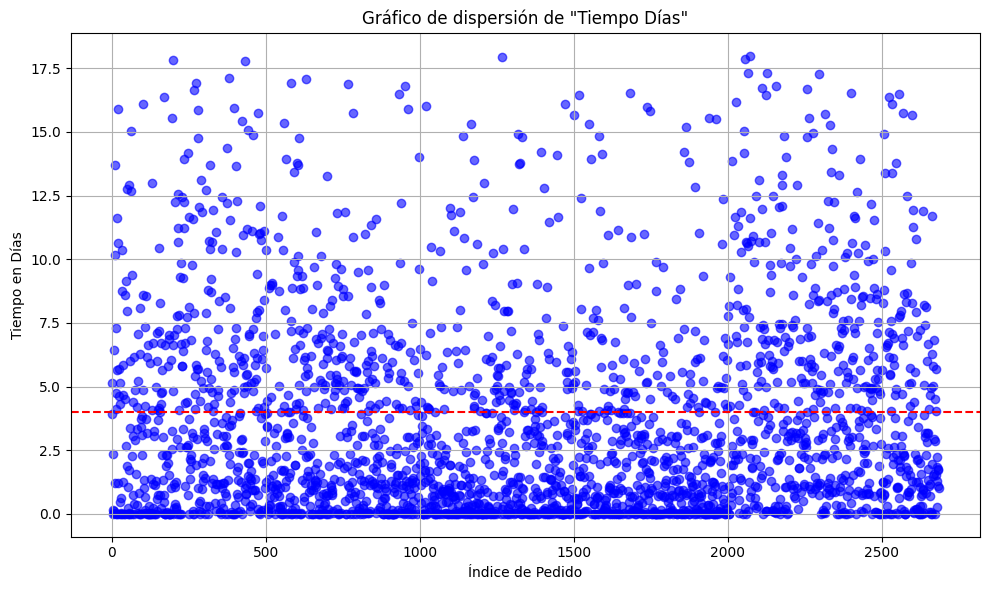

In [98]:
# Filtrar los registros que tarden más de 18 días 
df_filtrado = df_agrupado[(df_agrupado['Tiempo Días'] <= 18)]

# Graficar el scatter plot con los datos filtrados
plt.figure(figsize=(10, 6))

# Usamos el índice del DataFrame para el eje X y 'Tiempo Días' para el eje Y
plt.scatter(df_filtrado.index, df_filtrado['Tiempo Días'], color='blue', alpha=0.6)

# Agregar título y etiquetas de los ejes
plt.title('Gráfico de dispersión de "Tiempo Días"')
plt.xlabel('Índice de Pedido')
plt.ylabel('Tiempo en Días')

# Agregar una línea horizontal punteada en los 14 días
plt.axhline(y=4, color='red', linestyle='--', label=' días')
# Agregar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()  # Asegura que todo quede bien distribuido
plt.show()

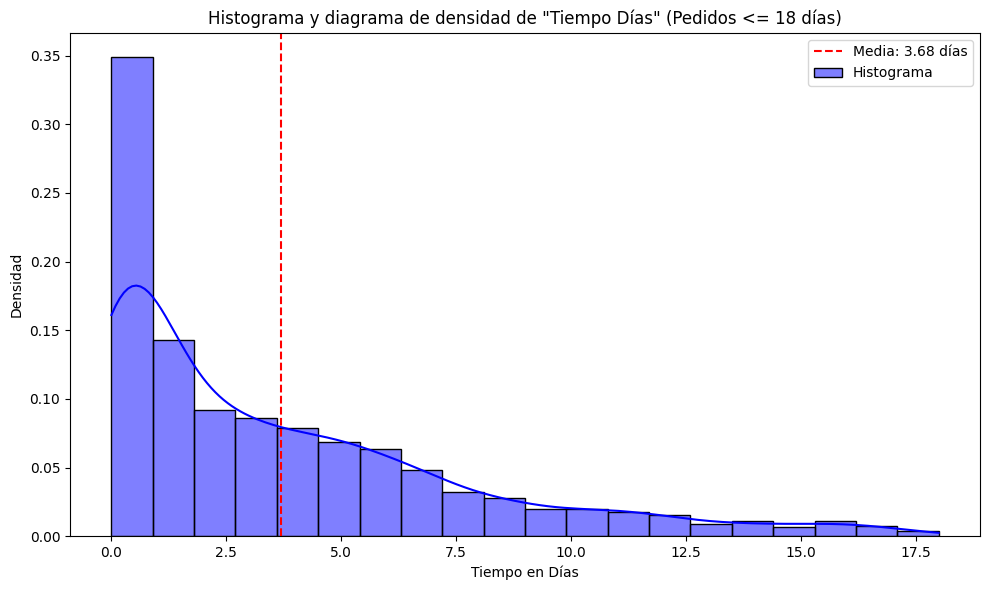

Porcentaje de pedidos que tardan menos de 2 días: 46.20%
Porcentaje de pedidos que tardan menos de 1 día: 33.32%


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar los registros que tarden 18 días o menos
df_filtrado = df_agrupado[df_agrupado['Tiempo Días'] <= 18]

# Calcular la media de "Tiempo Días"
media_tiempo_dias = df_filtrado['Tiempo Días'].mean()

# Graficar el histograma junto con el gráfico de densidad
plt.figure(figsize=(10, 6))

# Histograma de 'Tiempo Días'
sns.histplot(df_filtrado['Tiempo Días'], kde=True, color='blue', bins=20, stat="density", label='Histograma')

# Agregar una línea vertical en la media
plt.axvline(x=media_tiempo_dias, color='red', linestyle='--', label=f'Media: {media_tiempo_dias:.2f} días')

# Agregar título y etiquetas
plt.title('Histograma y diagrama de densidad de "Tiempo Días" (Pedidos <= 18 días)')
plt.xlabel('Tiempo en Días')
plt.ylabel('Densidad')

# Mostrar leyenda y gráfico
plt.legend()
plt.tight_layout()
plt.show()

# Filtrar los registros que tarden 18 días o menos
df_filtrado = df_agrupado[df_agrupado['Tiempo Días'] <= 18]

# Calcular el total de pedidos en el conjunto de datos filtrado
total_pedidos = df_filtrado.shape[0]

# Calcular el número de pedidos que tardan menos de 2 días
pedidos_menos_2_dias = df_filtrado[df_filtrado['Tiempo Días'] < 2].shape[0]

# Calcular el número de pedidos que tardan menos de 1 día
pedidos_menos_1_dia = df_filtrado[df_filtrado['Tiempo Días'] < 1].shape[0]

# Calcular el porcentaje de pedidos que tardan menos de 2 días
porcentaje_menos_2_dias = (pedidos_menos_2_dias / total_pedidos) * 100

# Calcular el porcentaje de pedidos que tardan menos de 1 día
porcentaje_menos_1_dia = (pedidos_menos_1_dia / total_pedidos) * 100

# Mostrar los resultados
print(f"Porcentaje de pedidos que tardan menos de 2 días: {porcentaje_menos_2_dias:.2f}%")
print(f"Porcentaje de pedidos que tardan menos de 1 día: {porcentaje_menos_1_dia:.2f}%")


#### Corrección de las etapas que duran 1 minuto

In [100]:
# Función para convertir 'HH:MM' a minutos totales
def convertir_a_minutos(tiempo_str):
    try:
        horas, minutos = map(int, tiempo_str.split(':'))
        return horas * 60 + minutos
    except:
        return None  # Manejar valores no válidos

# Aplicar la función de conversión a la columna 'Tiempo Horas' para obtener minutos
df['Tiempo Minutos'] = df['Tiempo Horas'].apply(convertir_a_minutos)

# Filtrar las tareas que tardan menos de 10 minutos
tareas_menos_10_minutos = df[df['Tiempo Minutos'] < 2]

# Contar la cantidad de tareas que cumplen la condición
cantidad_tareas_menos_10_minutos = tareas_menos_10_minutos.shape[0]

# Mostrar la cantidad de tareas
print(f"Cantidad de tareas que tardan 1 minuto: {cantidad_tareas_menos_10_minutos}")


Cantidad de tareas que tardan 1 minuto: 4925


In [101]:
import pandas as pd

# Configurar pandas para que muestre todas las columnas y filas sin truncarlas, y con el ancho adecuado
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas en una sola vista, sin truncar

# Función para convertir 'HH:MM' a minutos totales
def convertir_a_minutos(tiempo_str):
    try:
        horas, minutos = map(int, tiempo_str.split(':'))
        return horas * 60 + minutos
    except:
        return None  # Manejar valores no válidos

# Aplicar la función de conversión a la columna 'Tiempo Horas' para obtener minutos
df['Tiempo Minutos'] = df['Tiempo Horas'].apply(convertir_a_minutos)

# Crear el resumen por etapa con nuevas columnas para 2 minutos y 3 minutos
resumen_etapas = df.groupby('Etapa').agg(
    cantidad_tareas=('Etapa', 'size'),  # Contar la cantidad de tareas por etapa
    cantidad_tareas_1_minuto=('Tiempo Minutos', lambda x: (x == 1).sum()),  # Contar cuántas tareas duran 1 minuto
).reset_index()  # Aquí va el reset_index() inmediatamente después del agg()

# Crear un resumen por etapa sin contar tareas que duran de 0 a 3 minutos inclusive
resumen_etapas_sin_0_a_3 = df[df['Tiempo Minutos'] > 3].groupby('Etapa').agg(
    promedio_duracion_minutos_sin_0_a_3=('Tiempo Minutos', 'mean')  # Calcular el promedio en minutos excluyendo 0-3 minutos
).reset_index()

print(resumen_etapas_sin_0_a_3)



                     Etapa  promedio_duracion_minutos_sin_0_a_3
0                  ACABADO                           970.344697
1                   AJUSTE                          2791.522047
2   AJUSTE EN ESTADO VERDE                           507.428571
3                   ATACHE                             4.000000
4               BIZCOCHADO                          4610.542169
5                 CARILLAS                          6447.346154
6              CEMENTACIÓN                          1038.803922
7                  CORONAS                          3606.011146
8        DISEÑO DE SONRISA                          7390.678808
9               DISILICATO                           927.297297
10              EMERGENTES                          4328.166667
11                   ENCIA                          1142.428571
12                  ENCIAS                          4572.100000
13                GLASEADO                          1872.392157
14                   GUIAS              

In [102]:
import pandas as pd
import numpy as np

# Configurar pandas para que muestre todas las columnas y filas sin truncarlas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Función para convertir 'HH:MM' a minutos totales
def convertir_a_minutos(tiempo_str):
    try:
        horas, minutos = map(int, tiempo_str.split(':'))
        return horas * 60 + minutos
    except:
        return None  # Manejar valores no válidos

# Aplicar la función de conversión a la columna 'Tiempo Horas' para obtener minutos
df['Tiempo Minutos'] = df['Tiempo Horas'].apply(convertir_a_minutos)

# Función para reemplazar valores entre 0 y 3 minutos con un valor aleatorio basado en el promedio de la etapa
def reemplazar_tiempo_minutos(row, tabla_combinada):
    if 0 <= row['Tiempo Minutos'] <= 3:  # Si el valor está entre 0 y 3 minutos
        # Obtener el promedio de la etapa
        promedio_etapa = tabla_combinada.loc[tabla_combinada['Etapa'] == row['Etapa'], 'promedio_duracion_minutos_sin_0_a_3'].values[0]
        
        # Generar un valor aleatorio entre el 80% y el 120% del promedio de la etapa
        valor_aleatorio = np.random.uniform(0.8 * promedio_etapa, 1.2 * promedio_etapa)
        
        return valor_aleatorio
    else:
        return row['Tiempo Minutos']  # Mantener el valor original si no está entre 0 y 3 minutos

# Aplicar la función de reemplazo en el DataFrame df
df['Tiempo Minutos'] = df.apply(reemplazar_tiempo_minutos, axis=1, tabla_combinada=tabla_combinada)

# Recalcular la columna 'Tiempo Días' basada en la columna nueva 'Tiempo Minutos'
df['Tiempo Días'] = df['Tiempo Minutos'] / 1440  # Convertir minutos a días (1440 minutos en un día)

# Verificación: cantidad de registros entre 1 y 3 minutos por etapa
verificacion_minutos_1_3 = df[(df['Tiempo Minutos'] >= 1) & (df['Tiempo Minutos'] <= 3)].groupby('Etapa').agg(
    cantidad_registros_1_3_minutos=('Tiempo Minutos', 'size')  # Contar cuántos registros hay entre 1 y 3 minutos por etapa
).reset_index()

# Mostrar las primeras filas del DataFrame actualizado
print(df.head())


     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

                Início           Finalizado     Fecha entrada Fecha prevista  \
0  22/01/2024 16:05:00  22/01/2024 16:05:00  31/08/2023 12:12      8/11/2023   
1   8/03/2024 11:32:00  11/03/2024 10:46

In [103]:
import numpy as np

# Filtramos los registros de df que tienen Tiempo Minutos <= 3
mask = df["Tiempo Minutos"] <= 3

# Función para generar un valor random dentro del 20% por encima o por debajo del promedio
def get_random_within_20_percent(promedio):
    lower_bound = promedio * 0.80
    upper_bound = promedio * 1.20
    return int(np.random.uniform(lower_bound, upper_bound))  # Convertimos a entero

# Normalizamos ambas columnas 'Etapa' para que no sea sensible a mayúsculas
df["Etapa_normalizada"] = df["Etapa"].str.upper()
resumen_etapas_sin_0_a_3["Etapa_normalizada"] = resumen_etapas_sin_0_a_3["Etapa"].str.upper()

# Aplicamos la transformación solo a los registros con Tiempo Minutos <= 3
df.loc[mask, 'Tiempo Minutos'] = df.loc[mask, 'Etapa_normalizada'].map(
    lambda etapa: get_random_within_20_percent(
        resumen_etapas_sin_0_a_3.loc[resumen_etapas_sin_0_a_3["Etapa_normalizada"] == etapa, 
                                     "promedio_duracion_minutos_sin_0_a_3"].values[0]
    ) if not resumen_etapas_sin_0_a_3.loc[resumen_etapas_sin_0_a_3["Etapa_normalizada"] == etapa, 
                                          "promedio_duracion_minutos_sin_0_a_3"].empty else np.nan
)

# Imputamos los valores nulos en 'Tiempo Minutos' con el promedio de la etapa
df.loc[df["Tiempo Minutos"].isnull(), 'Tiempo Minutos'] = df.loc[df["Tiempo Minutos"].isnull(), 'Etapa_normalizada'].map(
    lambda etapa: int(
        resumen_etapas_sin_0_a_3.loc[resumen_etapas_sin_0_a_3["Etapa_normalizada"] == etapa, 
                                     "promedio_duracion_minutos_sin_0_a_3"].values[0]
    ) if not resumen_etapas_sin_0_a_3.loc[resumen_etapas_sin_0_a_3["Etapa_normalizada"] == etapa, 
                                          "promedio_duracion_minutos_sin_0_a_3"].empty else np.nan
)

# Actualizamos la columna "Tiempo Días" que es "Tiempo Minutos" dividido por 1440 (minutos en un día)
df["Tiempo Días"] = df["Tiempo Minutos"] / 1440

# Eliminamos la columna de normalización para mostrar el resultado final
df.drop(columns=["Etapa_normalizada"], inplace=True)

# Mostramos el DataFrame actualizado
print(df.head())


     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

                Início           Finalizado     Fecha entrada Fecha prevista  \
0  22/01/2024 16:05:00  22/01/2024 16:05:00  31/08/2023 12:12      8/11/2023   
1   8/03/2024 11:32:00  11/03/2024 10:46

C:\Users\paula\AppData\Local\Temp\ipykernel_20964\340870063.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[mask, 'Tiempo Minutos'] = df.loc[mask, 'Etapa_normalizada'].map(


In [104]:
# Elimino el valor nulo que no se porque no se imputa
df = df[df["Nº"] != "0321"]

In [105]:
# Convertir la columna "Tiempo Minutos" a enteros
df["Tiempo Minutos"] = df["Tiempo Minutos"].astype(int)
print(df.head())

     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

                Início           Finalizado     Fecha entrada Fecha prevista  \
0  22/01/2024 16:05:00  22/01/2024 16:05:00  31/08/2023 12:12      8/11/2023   
1   8/03/2024 11:32:00  11/03/2024 10:46

In [59]:
# Cambio la columna de Fecha finalización para que tenga sentido

import pandas as pd
from datetime import timedelta

# Convertimos las columnas "Início" y "Finalizado" a formato de fecha y hora
df["Início"] = pd.to_datetime(df["Início"], format='%d/%m/%Y %H:%M:%S')
df["Finalizado"] = pd.to_datetime(df["Finalizado"], format='%d/%m/%Y %H:%M:%S')

# Reemplazo de "Tiempo Minutos" por el promedio se indica con valores nuevos o NaN, revisamos esos casos
# Suponemos que los valores reemplazados por el promedio están marcados como NaN inicialmente y luego con un nuevo valor

# Encontramos registros cuyo "Tiempo Minutos" fue reemplazado
# (puedes personalizar la condición si tienes otra forma de identificar los cambios)
mask_reemplazados = df["Tiempo Minutos"].isna() | df["Tiempo Minutos"].notnull()  # Ajusta según el caso

# Calculamos la nueva fecha de "Finalizado" sumando "Tiempo Minutos" al valor de "Início"
df.loc[mask_reemplazados, "Finalizado"] = df.loc[mask_reemplazados].apply(
    lambda row: row["Início"] + timedelta(minutes=row["Tiempo Minutos"]), axis=1
)

# Mostramos el DataFrame actualizado
print(df.head())


C:\Users\paula\AppData\Local\Temp\ipykernel_20964\2275929406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Início"] = pd.to_datetime(df["Início"], format='%d/%m/%Y %H:%M:%S')
C:\Users\paula\AppData\Local\Temp\ipykernel_20964\2275929406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Finalizado"] = pd.to_datetime(df["Finalizado"], format='%d/%m/%Y %H:%M:%S')


     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

               Início          Finalizado     Fecha entrada Fecha prevista  \
0 2024-01-22 16:05:00 2024-01-25 04:51:00  31/08/2023 12:12      8/11/2023   
1 2024-03-08 11:32:00 2024-03-11 10:47:00  2

In [106]:
#Cambio la columna de Tiempo Horas

# Convertimos las columnas "Início" y "Finalizado" a formato de fecha y hora
df["Início"] = pd.to_datetime(df["Início"], format='%d/%m/%Y %H:%M:%S')
df["Finalizado"] = pd.to_datetime(df["Finalizado"], format='%d/%m/%Y %H:%M:%S')

# Reemplazo de "Tiempo Minutos" por el promedio, revisamos esos casos
# Suponemos que los valores reemplazados por el promedio están marcados por algún criterio,
# ajustar si tienes una lógica más precisa

# Filtramos aquellos registros donde 'Tiempo Minutos' fue reemplazado por el promedio
mask_reemplazados = df["Tiempo Minutos"].isna() | df["Tiempo Minutos"].notnull()  # Ajusta según tu criterio

# Actualizamos la columna "Finalizado" sumando "Tiempo Minutos" a la columna "Início"
df.loc[mask_reemplazados, "Finalizado"] = df.loc[mask_reemplazados].apply(
    lambda row: row["Início"] + timedelta(minutes=row["Tiempo Minutos"]), axis=1
)

# Actualizamos la columna "Tiempo Horas" dividiendo "Tiempo Minutos" por 60
df.loc[mask_reemplazados, "Tiempo Horas"] = df.loc[mask_reemplazados, "Tiempo Minutos"] / 60

# Convertimos "Tiempo Horas" a formato de horas:minutos (si es necesario)
df["Tiempo Horas"] = df["Tiempo Horas"].apply(lambda x: f'{int(x):02}:{int((x - int(x)) * 60):02}')

# Mostramos el DataFrame actualizado
print(df.head())


     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

               Início          Finalizado     Fecha entrada Fecha prevista  \
0 2024-01-22 16:05:00 2024-01-24 19:22:00  31/08/2023 12:12      8/11/2023   
1 2024-03-08 11:32:00 2024-03-11 10:47:00  2

In [107]:
# Agrupamos por 'Nº Repetición' (ID) y sumamos los 'Tiempo Días'
df_agrupado2 = df.groupby("Nº")["Tiempo Días"].sum().reset_index()

# Renombramos las columnas para mayor claridad
df_agrupado2.columns = ["ID", "Tiempo Días Total"]

# Mostramos el DataFrame agrupado
print(df_agrupado2)

          ID Tiempo Días Total
0     0011-2          5.365434
1     0011-3           6.31015
2     0013-2         22.581342
3     0013-3          2.331944
4     0013-4           1.26696
5       0014          0.136806
6       0015          0.745897
7     0015-2          9.103599
8       0016             5.388
9       0018         16.531231
10      0020         10.147917
11    0020-2          3.208946
12      0023          4.763889
13      0024          8.317149
14    0024-2          6.130556
15    0024-3          7.929443
16      0025         11.628472
17      0026           7.27179
18      0027          6.639947
19      0028         17.738233
20      0029             10.65
21    0029-2          4.169837
22      0031          4.610417
23    0031-2          6.742142
24      0032          3.783874
25      0033         31.921468
26      0034          5.120139
27      0035          4.326389
28    0035-2         14.086994
29      0038           0.83859
30    0038-2          0.408635
31      

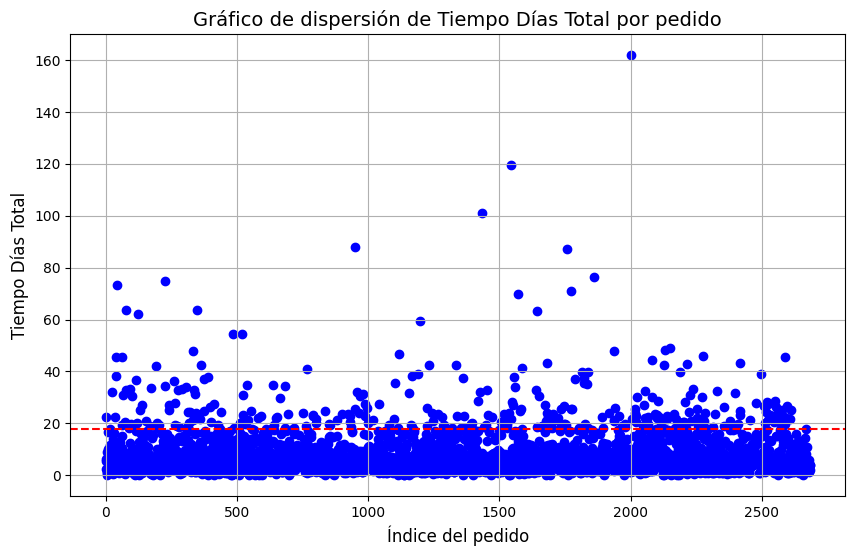

In [108]:
import matplotlib.pyplot as plt

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_agrupado2.index, df_agrupado2["Tiempo Días Total"], color='blue')

# Añadimos una línea horizontal en y=18
plt.axhline(y=18, color='red', linestyle='--', label='Límite: 18 días')

# Añadimos etiquetas y título
plt.title("Gráfico de dispersión de Tiempo Días Total por pedido", fontsize=14)
plt.xlabel("Índice del pedido", fontsize=12)
plt.ylabel("Tiempo Días Total", fontsize=12)

# Mostramos el gráfico
plt.grid(True)
plt.show()


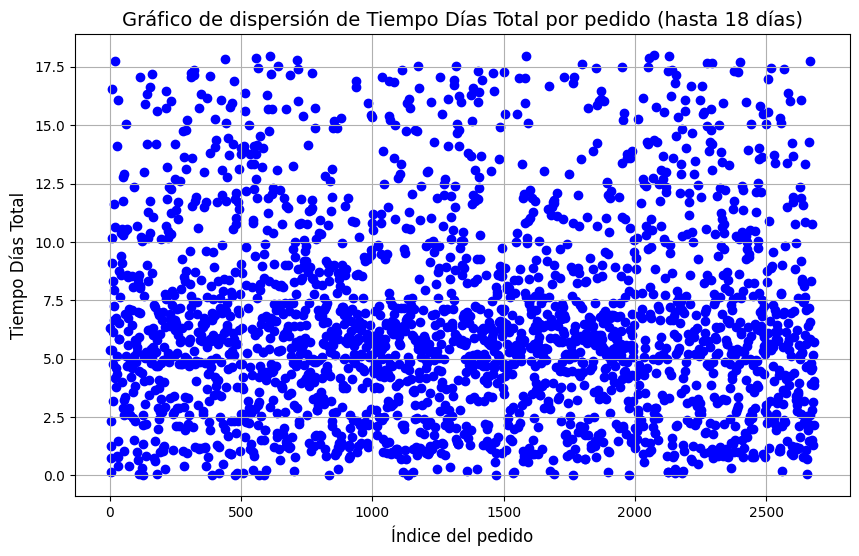

In [109]:
import matplotlib.pyplot as plt

# Filtramos los datos para mostrar solo aquellos con "Tiempo Días Total" menores o iguales a 18
df_filtrado2 = df_agrupado2[df_agrupado2["Tiempo Días Total"] <= 18]

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_filtrado2.index, df_filtrado2["Tiempo Días Total"], color='blue')

# Añadimos etiquetas y título
plt.title("Gráfico de dispersión de Tiempo Días Total por pedido (hasta 18 días)", fontsize=14)
plt.xlabel("Índice del pedido", fontsize=12)
plt.ylabel("Tiempo Días Total", fontsize=12)

# Mostramos el gráfico
plt.grid(True)
plt.show()

#### Chaqueo NAs

In [110]:
na_por_columna = df.isnull().sum()

# Mostramos el resultado
print(na_por_columna)

Nº                   0
Repetición|Ajuste    0
Cliente              0
Ctd                  0
Servicio             0
Sector               0
Etapa                0
Empleado             0
Início               0
Finalizado           0
Fecha entrada        0
Fecha prevista       0
Tiempo Horas         0
Tiempo Minutos       0
Tiempo Días          0
dtype: int64


#### Chequeamos variable Ctd 

In [111]:
df["Ctd"].describe()

count    13220.000000
mean         3.443192
std          4.348833
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         46.000000
Name: Ctd, dtype: float64

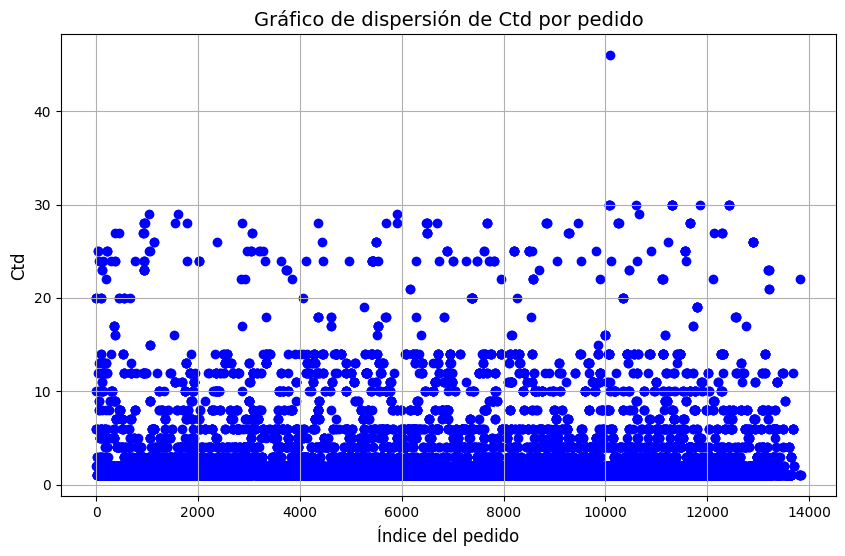

In [112]:
import matplotlib.pyplot as plt

# Creamos el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Ctd"], color='blue')

# Añadimos etiquetas y título
plt.title("Gráfico de dispersión de Ctd por pedido", fontsize=14)
plt.xlabel("Índice del pedido", fontsize=12)
plt.ylabel("Ctd", fontsize=12)

# Mostramos el gráfico
plt.grid(True)
plt.show()

In [81]:
df[df["Ctd"] == 46]


,Nº,Repetición|Ajuste,Cliente,Ctd,Servicio,Sector,Etapa,Empleado,Início,Finalizado,Fecha entrada,Fecha prevista,Tiempo Horas,Tiempo Minutos,Tiempo Días
10082,1624,-,MARTIN FERNUNSON,46,Diseño 3D por Pieza,DISEÑO,DISEÑO DE SONRISA,DEMIAN SANTOS,2024-06-07 10:19:00,2024-06-10 14:12:00,07/06/2024 09:12,19/06/2024,75:53,4553,3.161806


In [82]:
# Eliminamos los registros donde "Ctd" es igual a 46
df = df[df["Ctd"] != 46]

#### Anonimizamos los clientes

In [83]:
# Creamos un diccionario para mapear los clientes reales a un número ascendente
clientes_unicos = df["Cliente"].unique()
mapa_clientes = {cliente: idx + 1 for idx, cliente in enumerate(clientes_unicos)}

# Creamos una nueva tabla con el ID del cliente y su nombre real
tabla_clientes = pd.DataFrame(list(mapa_clientes.items()), columns=["ID Cliente", "Nombre Real"])

# Reemplazamos los nombres de los clientes por su ID en la columna "Cliente"
df["Cliente"] = df["Cliente"].map(mapa_clientes)

# Mostramos la nueva tabla de clientes y la tabla df con la columna "Cliente" anonimizada
print(tabla_clientes)
print(df.head())

                                ID Cliente  Nombre Real
0                            PEDRO MORALES            1
1                          ALAN SULIKOWSKI            2
2                       SANTIAGO BRAVERMAN            3
3                           CARINA PACENZA            4
4                         NORBERTO FUERTES            5
5                   HECTOR ALVAREZ CANTONI            6
6                    FRANCISCO JAVIER LELL            7
7                         LOURDES BONFIGLI            8
8                               LUIS URZUA            9
9                        FLORENCIA GAMBERG           10
10                          DIEGO GRINSPON           11
11                      FERNANDO CIFUENTES           12
12         LUCIANO MARTINEZ - MB INCLUSIVA           13
13                               VALENTINA           14
14                      PAULA ANALIA GOMEZ           15
15               PATRICIA MIGUEZ FERNANDEZ           16
16                     DIEGO VERGARA LOPEZ      

C:\Users\paula\AppData\Local\Temp\ipykernel_20964\2770467777.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cliente"] = df["Cliente"].map(mapa_clientes)


#### Anonimizamos los Empleados

In [84]:
# Creamos un diccionario para mapear los empleados reales a un número ascendente
empleados_unicos = df["Empleado"].unique()
mapa_empleados = {empleado: idx + 1 for idx, empleado in enumerate(empleados_unicos)}

# Creamos una nueva tabla con el ID del empleado y su nombre real
tabla_empleados = pd.DataFrame(list(mapa_empleados.items()), columns=["ID Empleado", "Nombre Real"])

# Reemplazamos los nombres de los empleados por su ID en la columna "Empleado"
df["Empleado"] = df["Empleado"].map(mapa_empleados)

# Mostramos la nueva tabla de empleados y la tabla df con la columna "Empleado" anonimizada
print(tabla_empleados)
print(df.head())

               ID Empleado  Nombre Real
0             NORMA JUNCAL            1
1          LUCIANO TORIANI            2
2            DEMIAN SANTOS            3
3          LUCAS RODRIGUEZ            4
4             MARIA CAMPOS            5
5  VIRGINIA PIERUCCI GECHT            6
6      JUAN MANUEL CORDOBA            7
7            PABLO SCHÄFER            8
8          RICARDO SCHÄFER            9
9            CRISTINA CRIS           10
     Nº Repetición|Ajuste  Cliente  Ctd                    Servicio    Sector  \
0  0051                 -        1   10              Encia Acrilica  ACRILICO   
1  0085                 -        2   20  Provisorio de PMMA Cad Cam   FRESADO   
2  0085                 -        2   20  Provisorio de PMMA Cad Cam  ACRILICO   
3  0085                 -        2   20  Provisorio de PMMA Cad Cam    DISEÑO   
4  0099                 -        3    6         Diseño 3D por Pieza    DISEÑO   

               Etapa  Empleado              Início          Finalizado  \

C:\Users\paula\AppData\Local\Temp\ipykernel_20964\2515427254.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Empleado"] = df["Empleado"].map(mapa_empleados)


#### Agrego ATRASADO y cuantos días

In [118]:
# Convertir las columnas de fechas a tipo datetime para poder comparar, especificando dayfirst=True
df['Finalizado'] = pd.to_datetime(df['Finalizado'])
df['Fecha prevista'] = pd.to_datetime(df['Fecha prevista'], dayfirst=True)

# Agrupar por ID Pedido y obtener la última fecha de finalización por pedido
df['Última Finalización'] = df.groupby('Nº')['Finalizado'].transform('max')

# Comparar la última fecha de finalización con la fecha prevista para determinar si el pedido está atrasado
df['Atrasado'] = df['Última Finalización'] > df['Fecha prevista']

# Convertir el booleano True/False a 'SI' o 'NO'
df['Atrasado'] = df['Atrasado'].apply(lambda x: 'SI' if x else 'NO')

# Mostrar el DataFrame resultante
print(df.head())

     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

               Início          Finalizado     Fecha entrada Fecha prevista  \
0 2024-01-22 16:05:00 2024-01-24 19:22:00  31/08/2023 12:12     2023-11-08   
1 2024-03-08 11:32:00 2024-03-11 10:47:00  2

In [120]:
# Convertir las columnas de fechas a tipo datetime para poder comparar, especificando dayfirst=True
df['Finalizado'] = pd.to_datetime(df['Finalizado'])
df['Fecha prevista'] = pd.to_datetime(df['Fecha prevista'], dayfirst=True)

# Agrupar por ID Pedido y obtener la última fecha de finalización por pedido
df['Última Finalización'] = df.groupby('Nº')['Finalizado'].transform('max')

# Comparar la última fecha de finalización con la fecha prevista para determinar si el pedido está atrasado
df['Atrasado'] = df['Última Finalización'] > df['Fecha prevista']

# Calcular los días de atraso, solo si el pedido está atrasado, y agregarlo en una nueva columna
df['Días de Atraso'] = (df['Última Finalización'] - df['Fecha prevista']).dt.days
df['Días de Atraso'] = df['Días de Atraso'].apply(lambda x: x if x > 0 else 0)

# Convertir el booleano True/False a 'SI' o 'NO' en la columna Atrasado
df['Atrasado'] = df['Atrasado'].apply(lambda x: 'SI' if x else 'NO')

# Mostrar el DataFrame resultante
print(df.head())

     Nº Repetición|Ajuste             Cliente  Ctd  \
0  0051                 -       PEDRO MORALES   10   
1  0085                 -     ALAN SULIKOWSKI   20   
2  0085                 -     ALAN SULIKOWSKI   20   
3  0085                 -     ALAN SULIKOWSKI   20   
4  0099                 -  SANTIAGO BRAVERMAN    6   

                     Servicio    Sector              Etapa         Empleado  \
0              Encia Acrilica  ACRILICO             RESINA     NORMA JUNCAL   
1  Provisorio de PMMA Cad Cam   FRESADO               PMMA  LUCIANO TORIANI   
2  Provisorio de PMMA Cad Cam  ACRILICO        TERMINACION    DEMIAN SANTOS   
3  Provisorio de PMMA Cad Cam    DISEÑO            CORONAS    DEMIAN SANTOS   
4         Diseño 3D por Pieza    DISEÑO  DISEÑO DE SONRISA  LUCAS RODRIGUEZ   

               Início          Finalizado     Fecha entrada Fecha prevista  \
0 2024-01-22 16:05:00 2024-01-24 19:22:00  31/08/2023 12:12     2023-11-08   
1 2024-03-08 11:32:00 2024-03-11 10:47:00  2

#### Exportación de los datos finales limpios

In [123]:
# Exportamos el DataFrame 'df' a un archivo CSV
df.to_csv('df_limpio.csv', index=False)

# Confirmación de la operación
print("El archivo ha sido exportado exitosamente como 'df_limpio.csv'.")

El archivo ha sido exportado exitosamente como 'df_limpio.csv'.


In [121]:
print(df.shape)

(13220, 18)


In [122]:
print(df.columns)

Index(['Nº', 'Repetición|Ajuste', 'Cliente', 'Ctd', 'Servicio', 'Sector',
       'Etapa', 'Empleado', 'Início', 'Finalizado', 'Fecha entrada',
       'Fecha prevista', 'Tiempo Horas', 'Tiempo Minutos', 'Tiempo Días',
       'Última Finalización', 'Atrasado', 'Días de Atraso'],
      dtype='object')
